# **DEEP LEARNING**

**UNIVERSIDAD MILITAR NUEVA GRANADA**

**DEEP LEARNING - LOAD DATA AND DATA AUGMENTATION**

Ingeniería en Telecomunicaciones

https://www.kaggle.com/scolianni/mnistasjpg

https://www.tensorflow.org/tutorials/load_data/images

# Cargue de librerías

In [ ]:
# Carga de librerías
import numpy as np
import tensorflow as tf
import PIL
import PIL.Image
import pathlib
import matplotlib.pyplot as plt

In [ ]:
# Carga de módulos
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D

# Leer y descomprimir archivo

In [ ]:
# Desde un archivo subido al enterno de ejecución

# Ejemplo para descomprimir archivos tar o tar.gz
# Es necesario crear la carpeta de destino (Ej. /content/MNIST/)
!tar -xzf /content/trainingSet.tar -C /content/MNIST/

# Ejemplo para descomprimir archivos Zip
# !unzip -qq "/content/notMNIST_small.zip"

tar (child): /content/trainingSet.tar: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


# Info general del dataset

In [ ]:
import pathlib
data_dir = "/content/MNIST/trainingSet"
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

42000


In [ ]:
A = list(data_dir.glob('3/*'))
PIL.Image.open(str(A[10]))


# Cargar usando Keras pre-processing y visualización datos transformados (BS=1)

In [ ]:
# Dimensiones de imagen
img_height = 28
img_width = 28

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator # Alternativa desde TF
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    #width_shift_range=[0.2],     # Desplazamiento horizontal
    height_shift_range=[0.2],    # Desplazamiento vertical
    #horizontal_flip=True,        # Efecto espejo horizontal
    #vertical_flip=True,          # Efecto espejo vertical
    #rotation_range=45,           # Rotación
    ##samplewise_std_normalization=True,   # Normalización
    #brightness_range=(0.25, 0.75),       # Brillo
    #channel_shift_range=115.3,           # Desplazamiento de canal
    #shear_range=40, fill_mode='constant', # Angulo de corte
    ##rescale=1./255,
    #zoom_range=0.2,
    validation_split=0.2
        )

train_generator = train_datagen.flow_from_directory(
        'MNIST/trainingSet',
        target_size=(img_height, img_width),
        batch_size=1,
        class_mode='categorical',
        subset='training'
        )

val_generator = train_datagen.flow_from_directory(
        'MNIST/trainingSet',
        target_size=(img_height, img_width),
        batch_size=1,
        class_mode='categorical',
        subset='validation'
        )

Found 33604 images belonging to 10 classes.
Found 8396 images belonging to 10 classes.


In [ ]:
#class_names = train_ds.class_names
class_names = train_generator.classes
len(class_names)

33604

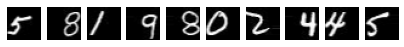

In [ ]:
# Plantilla para la figura
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(7,7))

# generate batch of images
for i in range(10):
  image = next(train_generator)[0].astype('uint8')   # Opcional para convertir a uint8
  #image = next(train_generator)[0]
  image2 = image.reshape((image.shape[1], image.shape[2], image.shape[3]))
	# Graficar la imagen
  ax[i].imshow(image2)
  ax[i].axis('off')

#for i in range(43001):
#  image = next(train_generator)[0].astype('uint8')   # Opcional para convertir a uint8

# Cargar usando Keras pre-processing (BS=32)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        #rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        #horizontal_flip=True,
        validation_split=0.2
        )

train_generator = train_datagen.flow_from_directory(
        'MNIST/trainingSet',
        target_size=(img_height, img_width),
        batch_size=32,
        class_mode='categorical',
        subset='training'
        )

val_generator = train_datagen.flow_from_directory(
        'MNIST/trainingSet',
        target_size=(img_height, img_width),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
        )

Found 33604 images belonging to 10 classes.
Found 8396 images belonging to 10 classes.


In [ ]:
# Dimensiones de los tensores
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 28, 28, 3)
(32, 10)


# Modelo

In [ ]:
num_classes = 10

model = Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  #Conv2D(32, 3, activation='relu'),
  #MaxPooling2D(),
  Flatten(),
  #Dense(128, activation='relu'),
  Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

# Entrenamiento

In [ ]:
model.fit(
        train_generator,
        epochs=5,
        validation_data=val_generator,
        )

Epoch 1/5
1051/1051 [==============================] - 39s 34ms/step - loss: 0.2719 - accuracy: 0.9169 - val_loss: 0.1079 - val_accuracy: 0.9652
Epoch 2/5
1051/1051 [==============================] - 39s 37ms/step - loss: 0.0857 - accuracy: 0.9752 - val_loss: 0.0833 - val_accuracy: 0.9734
Epoch 3/5
1051/1051 [==============================] - 34s 32ms/step - loss: 0.0657 - accuracy: 0.9800 - val_loss: 0.0760 - val_accuracy: 0.9761
Epoch 4/5
1051/1051 [==============================] - 35s 34ms/step - loss: 0.0555 - accuracy: 0.9827 - val_loss: 0.0591 - val_accuracy: 0.9819
Epoch 5/5
1051/1051 [==============================] - 35s 33ms/step - loss: 0.0482 - accuracy: 0.9847 - val_loss: 0.0578 - val_accuracy: 0.9833


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, None, None, None)  0         
                                                                 
 conv2d (Conv2D)             (None, None, None, 32)    896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 32)   0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 32)    9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 32)   0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, None)              0